# Image Processing Tutorial for Sensor Systems



## Overview

This tutorial will cover the following topics:

1. Introduction to Image Processing
2. Basic Operations
3. Image Preprocessing
4. Feature Extraction
5. Advanced Techniques
6. Applications in Sensor Systems
7. Exercises

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


## 1. Introduction to Image Processing

### What is Image Processing?

Image processing involves manipulating and analyzing images to extract meaningful information. It is widely used in various fields such as medical imaging, surveillance, robotics, and more.



### Importance in Sensor Systems

In sensor systems, image processing plays a critical role in enhancing and extracting relevant information from sensor data, facilitating decision-making processes.

## 2. Basic Operations

### Reading and Displaying Images

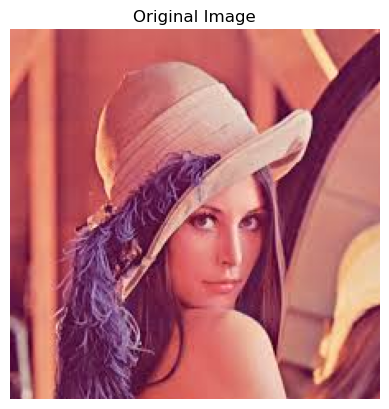

In [2]:


# Load an image from a file
image = cv2.imread('data/lena.jfif')

# Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

## Image Histograms

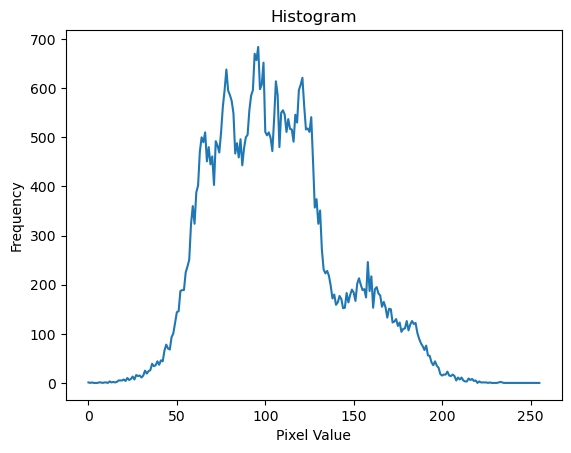

In [3]:
# Calculate and plot the histogram of the image
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.plot(histogram)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

### Color Spaces

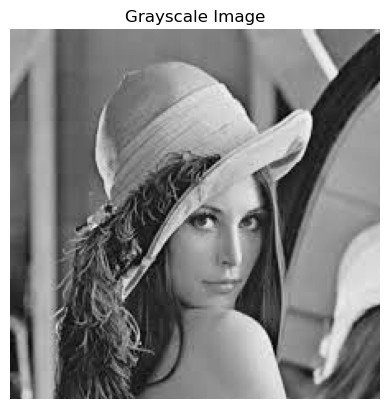

In [4]:
# Convert the image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


3. Image Preprocessing

Resizing

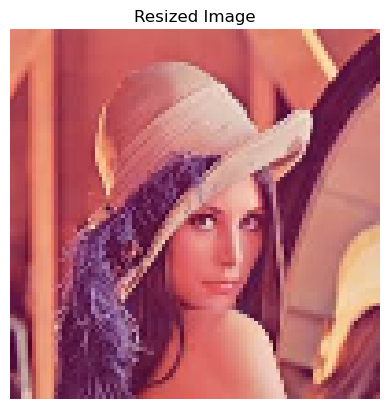

In [5]:
# Resizing the image
image_resized = cv2.resize(image, (100, 100))

# Display the resized image
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.axis('off')
plt.show()


Cropping

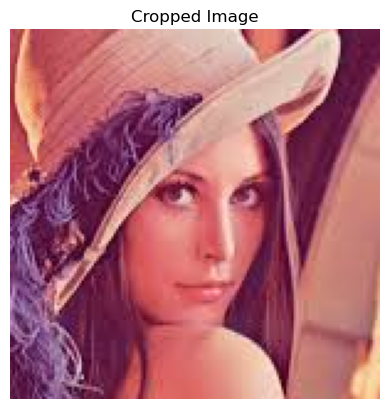

In [6]:
# Cropping the image
image_cropped = image[50:200, 50:200]

# Display the cropped image
plt.imshow(cv2.cvtColor(image_cropped, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')
plt.show()


Image Filtering - Smoothing

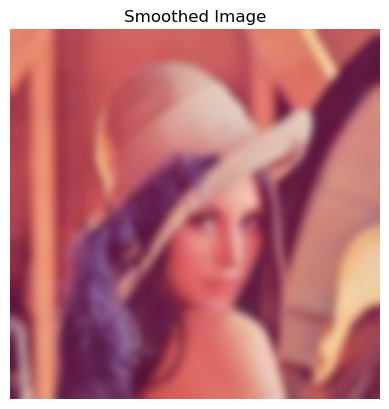

In [7]:
# Apply Gaussian smoothing to reduce noise and detail in the image
image_smoothed = cv2.GaussianBlur(image, (15, 15), 0)

# Display the smoothed image
plt.imshow(cv2.cvtColor(image_smoothed, cv2.COLOR_BGR2RGB))
plt.title('Smoothed Image')
plt.axis('off')
plt.show()


Image Filtering - Sharpening

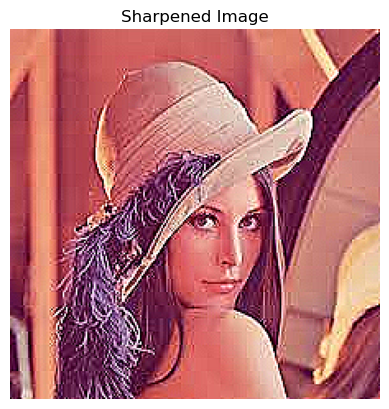

In [8]:
# Define a sharpening kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
# Apply the sharpening kernel to the image
image_sharpened = cv2.filter2D(image, -1, kernel)

# Display the sharpened image
plt.imshow(cv2.cvtColor(image_sharpened, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.axis('off')
plt.show()


4. Feature Extraction

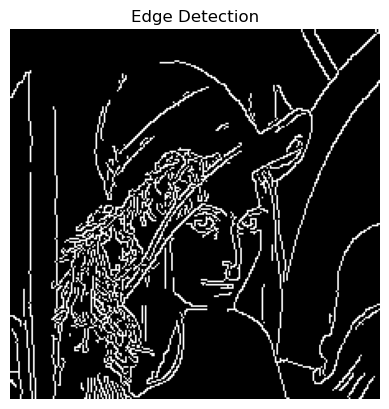

In [9]:
# Use the Canny edge detector to find edges in the grayscale image
edges = cv2.Canny(image_gray, 100, 200)

# Display the edges
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')
plt.show()


5. Advanced Techniques

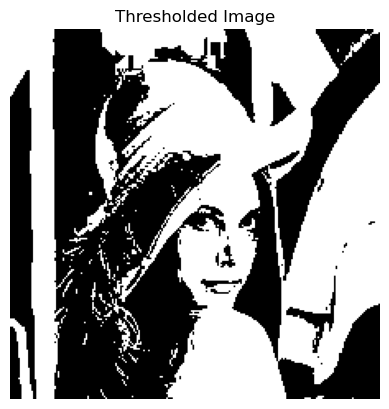

In [10]:
# Apply a binary threshold to the grayscale image
ret, thresh = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

# Display the thresholded image
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()


6. Applications in Sensor Systems

Object Detection

In [11]:
# Load a pre-trained Haar cascade classifier for face detection
face_cascade = cv2.CascadeClassifier('data\haarcascade_frontalface_default.xml')
# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(image_gray, 1.1, 4)

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the image with detected faces
plt.imshow(image_rgb)
plt.title('Detected Faces')
plt.axis('off')
plt.show()


error: OpenCV(4.9.0) E:\CUDA 12.4\opencv\opencv-4.9.0\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


# Lane Detection for Autonomous Vehicles
# --------------------------------------

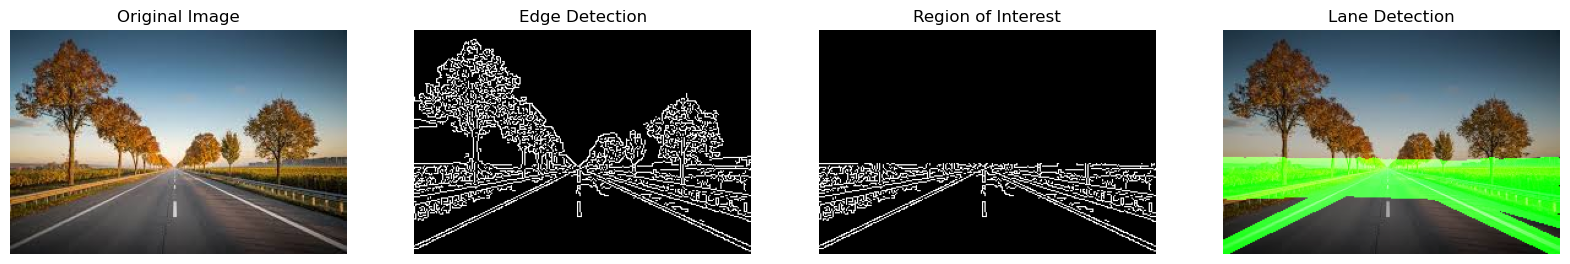

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a road image
road_image = cv2.imread('data/road.jfif')
road_image_rgb = cv2.cvtColor(road_image, cv2.COLOR_BGR2RGB)
road_image_gray = cv2.cvtColor(road_image, cv2.COLOR_BGR2GRAY)

# Edge detection
edges = cv2.Canny(road_image_gray, 50, 150)

# Define a region of interest (ROI)
height, width = edges.shape
mask = np.zeros_like(edges)
polygon = np.array([[
    (0, height),
    (width, height),
    (width, int(height * 0.6)),
    (0, int(height * 0.6))
]])
cv2.fillPoly(mask, polygon, 255)
roi = cv2.bitwise_and(edges, mask)

# Hough Transform to detect lines
lines = cv2.HoughLinesP(roi, 1, np.pi / 180, 50, maxLineGap=50)

# Draw the lines on a blank image
line_image = np.zeros_like(road_image_rgb)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 10)

# Combine the original image with the line image
combo_image = cv2.addWeighted(road_image_rgb, 0.8, line_image, 1, 0)

# Display the original image, edges, ROI, and the lane detection result
plt.figure(figsize=(20, 10))

plt.subplot(1, 4, 1)
plt.imshow(road_image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(roi, cmap='gray')
plt.title('Region of Interest')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(combo_image)
plt.title('Lane Detection')
plt.axis('off')

plt.show()


# Motion Detection
# ----------------

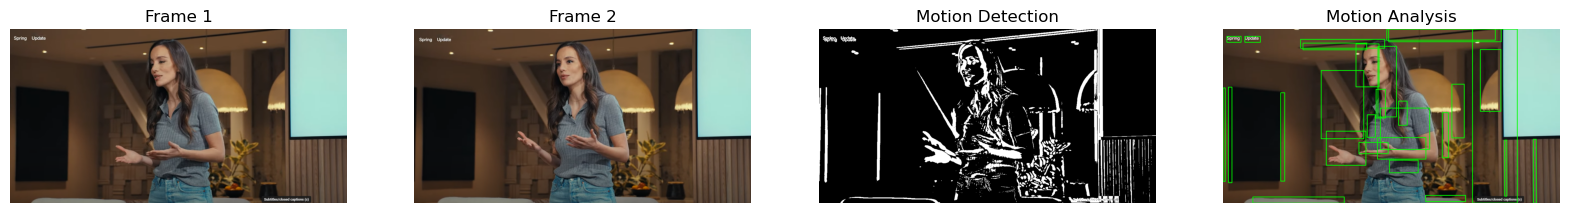

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read two consecutive frames (simulated here with two different images)
frame1 = cv2.imread('data/frame1.PNG')
frame2 = cv2.imread('data/frame2.PNG')

# Ensure both images have the same size by resizing them to the size of the smaller one
height1, width1 = frame1.shape[:2]
height2, width2 = frame2.shape[:2]

# Find the minimum dimensions
min_height = min(height1, height2)
min_width = min(width1, width2)

# Resize both frames to the same dimensions
frame1_resized = cv2.resize(frame1, (min_width, min_height))
frame2_resized = cv2.resize(frame2, (min_width, min_height))

# Convert the resized images to grayscale
gray_frame1 = cv2.cvtColor(frame1_resized, cv2.COLOR_BGR2GRAY)
gray_frame2 = cv2.cvtColor(frame2_resized, cv2.COLOR_BGR2GRAY)

# Compute the absolute difference between the two frames
diff = cv2.absdiff(gray_frame1, gray_frame2)

# Apply a binary threshold to the difference
ret, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

# Find contours in the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around the detected contours
motion_analysis = frame1_resized.copy()
for contour in contours:
    if cv2.contourArea(contour) > 500:  # Filter out small contours
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(motion_analysis, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the original frames, the difference, and the motion analysis
plt.figure(figsize=(20, 10))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(frame1_resized, cv2.COLOR_BGR2RGB))
plt.title('Frame 1')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(frame2_resized, cv2.COLOR_BGR2RGB))
plt.title('Frame 2')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(thresh, cmap='gray')
plt.title('Motion Detection')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(motion_analysis, cv2.COLOR_BGR2RGB))
plt.title('Motion Analysis')
plt.axis('off')

plt.show()


# Image Stitching for Panoramic Views
# -----------------------------------

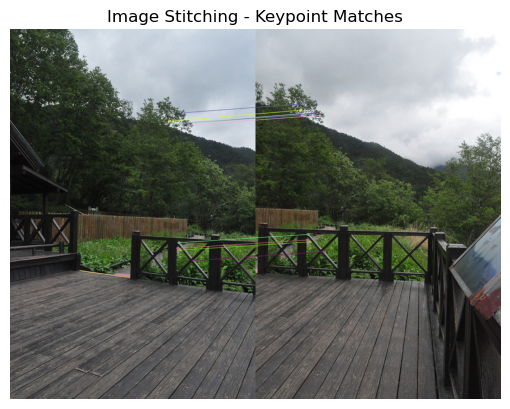

In [ ]:

# Load two overlapping images
image1 = cv2.imread('data/panorama1.jpg')
image2 = cv2.imread('data/panorama2.jpg')

# Convert images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Detect ORB keypoints and descriptors
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# Match descriptors using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
matched_image = cv2.drawMatches(image1, kp1, image2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched keypoints
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title('Image Stitching - Keypoint Matches')
plt.axis('off')
plt.show()


# Thermal Imaging Analysis
# ------------------------

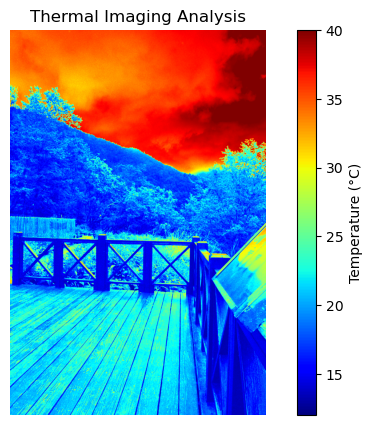

In [ ]:
# Load a thermal image
thermal_image = cv2.imread('data/panorama2.jpg', cv2.IMREAD_GRAYSCALE)
# Apply a colormap to the thermal image
thermal_colormap = cv2.applyColorMap(thermal_image, cv2.COLORMAP_JET)

# Display the thermal image with colormap
plt.figure(figsize=(10, 5))
img = plt.imshow(cv2.cvtColor(thermal_colormap, cv2.COLOR_BGR2RGB))
plt.title('Thermal Imaging Analysis')
plt.axis('off')

# Assume a temperature range for the pixel values (e.g., 0°C to 100°C)
temperature_min = 12
temperature_max = 40

# Normalize the temperature values for the colorbar
norm = plt.Normalize(vmin=temperature_min, vmax=temperature_max)
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])

# Add a colorbar with temperature labels
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('Temperature (°C)')

plt.show()

## 7. Exercises

### Exercise 1: Load a New Image and Convert It to Grayscale

1. Load an image using OpenCV.
2. Convert the loaded image to grayscale.
3. Display the grayscale image using Matplotlib.

### Exercise 2: Apply Gaussian Smoothing to the Grayscale Image

1. Use the grayscale image from Exercise 1.
2. Apply Gaussian smoothing to the grayscale image.
3. Display the smoothed image using Matplotlib.

### Exercise 3: Perform Edge Detection on the Smoothed Image

1. Use the smoothed image from Exercise 2.
2. Perform edge detection using the Canny edge detector.
3. Display the edges using Matplotlib.

### Exercise 4: Use a Different Color Space (e.g., HSV) and Display the Channels Separately

1. Convert the original image to a different color space (e.g., HSV).
2. Split the channels of the converted image.
3. Display each channel separately using Matplotlib.

### Exercise 5: Implement Morphological Operations (e.g., Erosion, Dilation) on a Binary Image

1. Use the thresholded image from the segmentation section.
2. Apply morphological operations like erosion and dilation.
3. Display the results of the morphological operations using Matplotlib.
